<a href="https://colab.research.google.com/github/JuanFelipeOrdonez/Procesamiento-digital-de-senales/blob/main/PDS_Sample_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

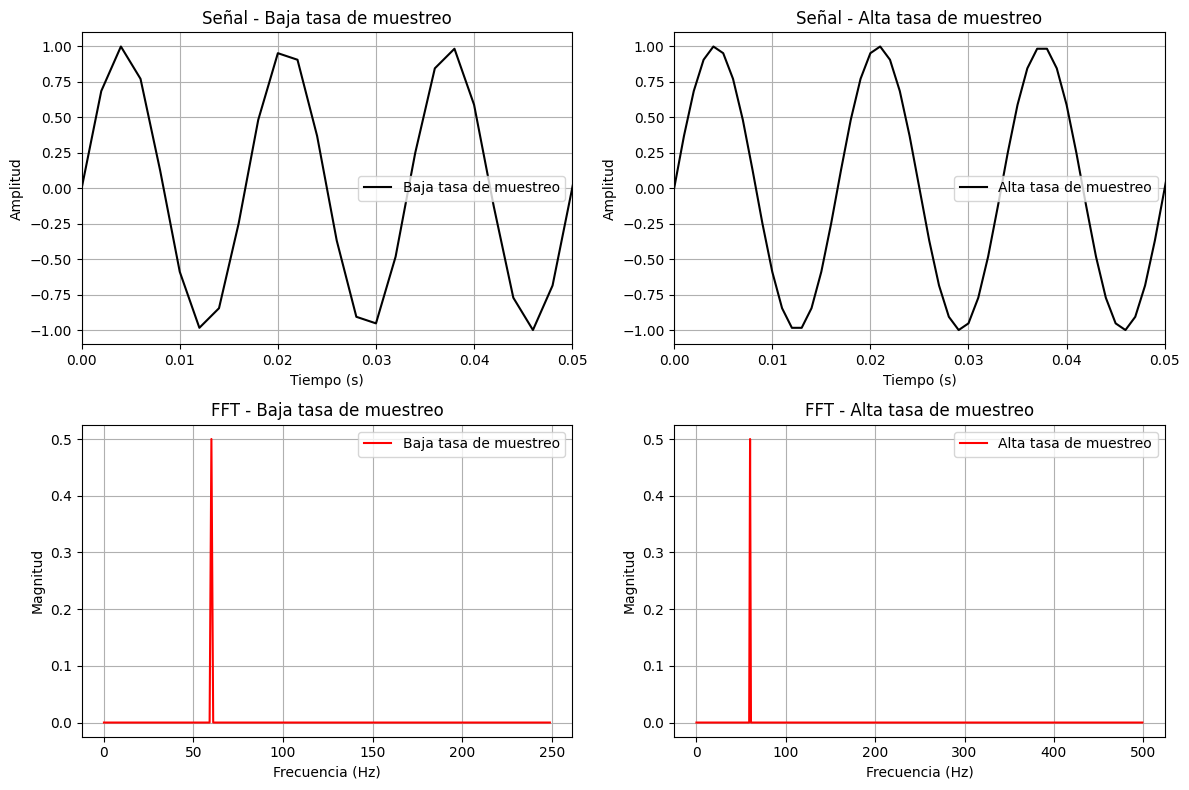

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parámetros
fs_high = 1000  # Alta frecuencia de muestreo (Hz)
fs_low = 500    # Baja frecuencia de muestreo (Hz)
duration = 1.0  # Duración de la señal (s)

# Generar tiempo y señales con linspace
t1 = np.linspace(0, duration, int(fs_low * duration), endpoint=False)
t2 = np.linspace(0, duration, int(fs_high * duration), endpoint=False)

y1 = np.sin(2 * np.pi * 60 * t1)  # Frecuencia de 60 Hz, baja tasa de muestreo
y2 = np.sin(2 * np.pi * 60 * t2)  # Frecuencia de 60 Hz, alta tasa de muestreo

# FFT de las señales
e1 = fft(y1)
e2 = fft(y2)

# Frecuencias asociadas
w1 = fftfreq(len(y1), 1/fs_low)
w2 = fftfreq(len(y2), 1/fs_high)

# Tomar solo la mitad del espectro
e1_mag = np.abs(e1) / len(y1)
e2_mag = np.abs(e2) / len(y2)

e1_mag = e1_mag[:len(e1)//2]
e2_mag = e2_mag[:len(e2)//2]
w1 = w1[:len(w1)//2]
w2 = w2[:len(w2)//2]

# Gráficos
plt.figure(figsize=(12, 8), dpi=100)

# Señal con baja tasa de muestreo
plt.subplot(2, 2, 1)
plt.plot(t1, y1, label="Baja tasa de muestreo", color='black')
plt.title("Señal - Baja tasa de muestreo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(0, 3*1/60)
plt.grid()
plt.legend()

# Señal con alta tasa de muestreo
plt.subplot(2, 2, 2)
plt.plot(t2, y2, label="Alta tasa de muestreo", color='black')
plt.title("Señal - Alta tasa de muestreo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(0, 3*1/60)
plt.grid()
plt.legend()

# Espectro de frecuencias - Baja tasa de muestreo
plt.subplot(2, 2, 3)
plt.plot(w1, e1_mag, label="Baja tasa de muestreo", color='red')
plt.title("FFT - Baja tasa de muestreo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Espectro de frecuencias - Alta tasa de muestreo
plt.subplot(2, 2, 4)
plt.plot(w2, e2_mag, label="Alta tasa de muestreo", color='red')
plt.title("FFT - Alta tasa de muestreo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

